In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Make the dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3 # uniformly distributed between (-3, +3)

# Sample non-linear function
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

This implements the function:

y = cos(2x1) + cos(3x2)

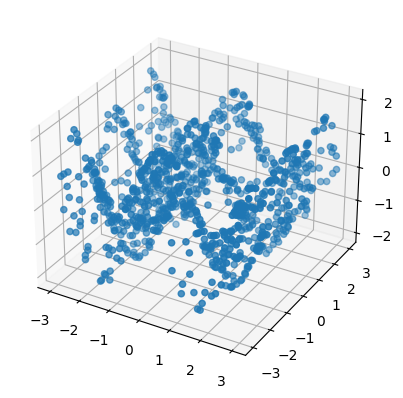

In [4]:
# Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
# plt.show()

In [5]:
# Build the model
model = nn.Sequential(
    nn.Linear(2, 128),
    nn.ReLU(),
    nn.Linear(128, 1)
)

In [6]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [7]:
# Train the model
def full_gd(model, criterion, optimizer, X_train, y_train, epochs=1000):
  # Stuff to store
  train_losses = np.zeros(epochs)

  for it in range(epochs):
    # zero the parameter gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
      
    # Backward and optimize
    loss.backward()
    optimizer.step()

    # Save losses
    train_losses[it] = loss.item()
      
    if (it + 1) % 50 == 0:
      print(f'Epoch {it+1}/{epochs}, Train Loss: {loss.item():.4f}')
  
  return train_losses

X_train = torch.from_numpy(X.astype(np.float32))
y_train = torch.from_numpy(Y.astype(np.float32).reshape(-1, 1))
train_losses = full_gd(model, criterion, optimizer, X_train, y_train)

Epoch 50/1000, Train Loss: 0.7326
Epoch 100/1000, Train Loss: 0.3752
Epoch 150/1000, Train Loss: 0.1481
Epoch 200/1000, Train Loss: 0.0462
Epoch 250/1000, Train Loss: 0.0168
Epoch 300/1000, Train Loss: 0.0167
Epoch 350/1000, Train Loss: 0.0064
Epoch 400/1000, Train Loss: 0.0053
Epoch 450/1000, Train Loss: 0.0056
Epoch 500/1000, Train Loss: 0.0045
Epoch 550/1000, Train Loss: 0.0055
Epoch 600/1000, Train Loss: 0.0049
Epoch 650/1000, Train Loss: 0.0054
Epoch 700/1000, Train Loss: 0.0062
Epoch 750/1000, Train Loss: 0.0043
Epoch 800/1000, Train Loss: 0.0041
Epoch 850/1000, Train Loss: 0.0037
Epoch 900/1000, Train Loss: 0.0049
Epoch 950/1000, Train Loss: 0.0035
Epoch 1000/1000, Train Loss: 0.0034


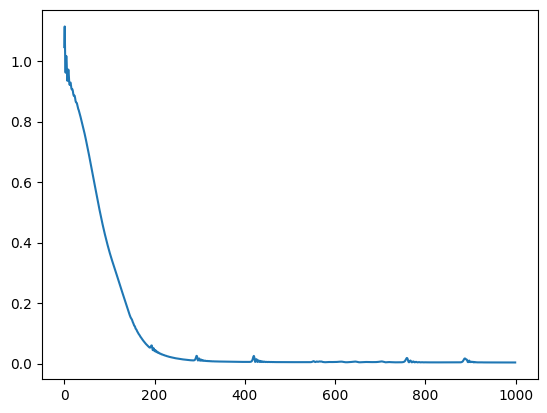

In [8]:
plt.plot(train_losses)

2500
2500
2500


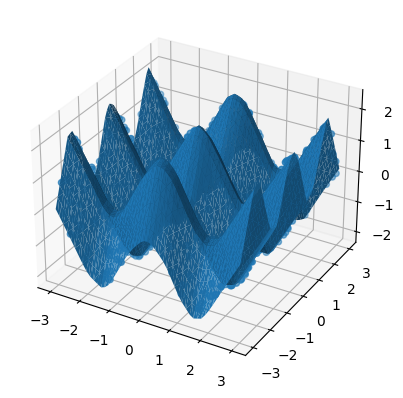

In [13]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
# PS - we can approximate cosine without using cosine with neural networks (pretty cool)
with torch.no_grad():
  line = np.linspace(-3, 3, 50)
  xx, yy = np.meshgrid(line, line)
  #print("xx")    
  #print(xx)
  #print("yy")    
  #print(yy)
  Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
  #print("Xgrid")
  #print(Xgrid)
  Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
  #print("Xgrid_torch")    
  #print(Xgrid_torch)
  Yhat = model(Xgrid_torch).numpy().flatten()
  #print("Yhat")
  #print(Yhat)
  ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
  print(len(Xgrid[:,0]))
  print(len(Xgrid[:,1]))
  print(len(Yhat))    
  plt.show()

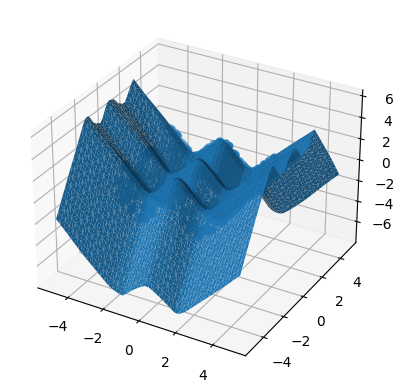

In [10]:
# Can it extrapolate?
# Extrapolation doesnt works
# Solution : try using periodic activation function i.e cosine function
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
with torch.no_grad():
  line = np.linspace(-5, 5, 50)
  xx, yy = np.meshgrid(line, line)
  Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
  Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
  Yhat = model(Xgrid_torch).numpy().flatten()
  ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
  plt.show()